
## Twitter Sentiment Analysis
### Dataset Description:
The dataset (twitter_training.csv) for Twitter sentiment analysis contains the following columns:

##### id: Identifier for each tweet.
##### entity: Entity related to the tweet (e.g., brand or topic).
##### text: Text content of the tweet.
##### label: Label indicating sentiment category (not explicitly used in this code).
### Code Description:
This code performs sentiment analysis on tweets using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analyzer from NLTK:

### Loading and Preparing the Dataset:

Loads the dataset without headers and assigns column names (id, entity, text, label).
### Sentiment Analysis:

Initializes the VADER sentiment analyzer (SentimentIntensityAnalyzer).
Computes sentiment scores (compound score) for each tweet text using a defined function (get_sentiment_score).
## Visualization:

Bar Plot: Shows average sentiment scores by entity.

Histogram: Displays the distribution of sentiment scores, highlighting the mean score and neutral sentiment threshold.

Word Clouds: Illustrates frequent words in positive and negative tweets.
## Top Tweets:

Top 5 Positive Tweets: Displays tweets with the highest sentiment scores.

Top 5 Negative Tweets: Shows tweets with the lowest sentiment scores.


This analysis reveals sentiment trends and key topics related to various entities on Twitter.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure you have downloaded the necessary NLTK data
nltk.download('vader_lexicon')

# Load the dataset without headers
data = pd.read_csv('twitter_training.csv', header=None)

display(data)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ziadk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [11]:
# Manually assign column names based on inspection
data.columns = ['id', 'entity', 'text', 'label']


# Print the head of the updated DataFrame
print("Updated DataFrame:")
display(data.head())


Updated DataFrame:


,id,entity,text,label
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis
data['sentiment_score'] = data['text'].apply(get_sentiment_score)

# Analyze sentiment by entity (e.g., brand or topic)
sentiment_by_entity = data.groupby('entity')['sentiment_score'].mean().reset_index()


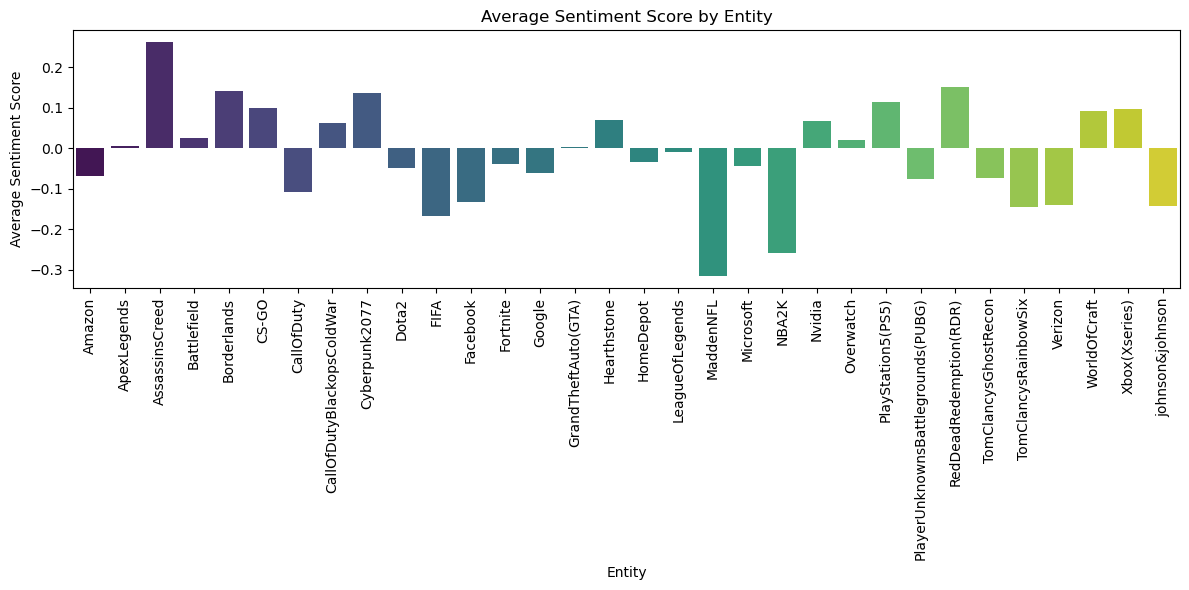

In [13]:
# Visualize sentiment by entity
plt.figure(figsize=(12, 6))
sns.barplot(x='entity', y='sentiment_score', data=sentiment_by_entity, palette='viridis')
plt.title('Average Sentiment Score by Entity')
plt.xlabel('Entity')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\ziadk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


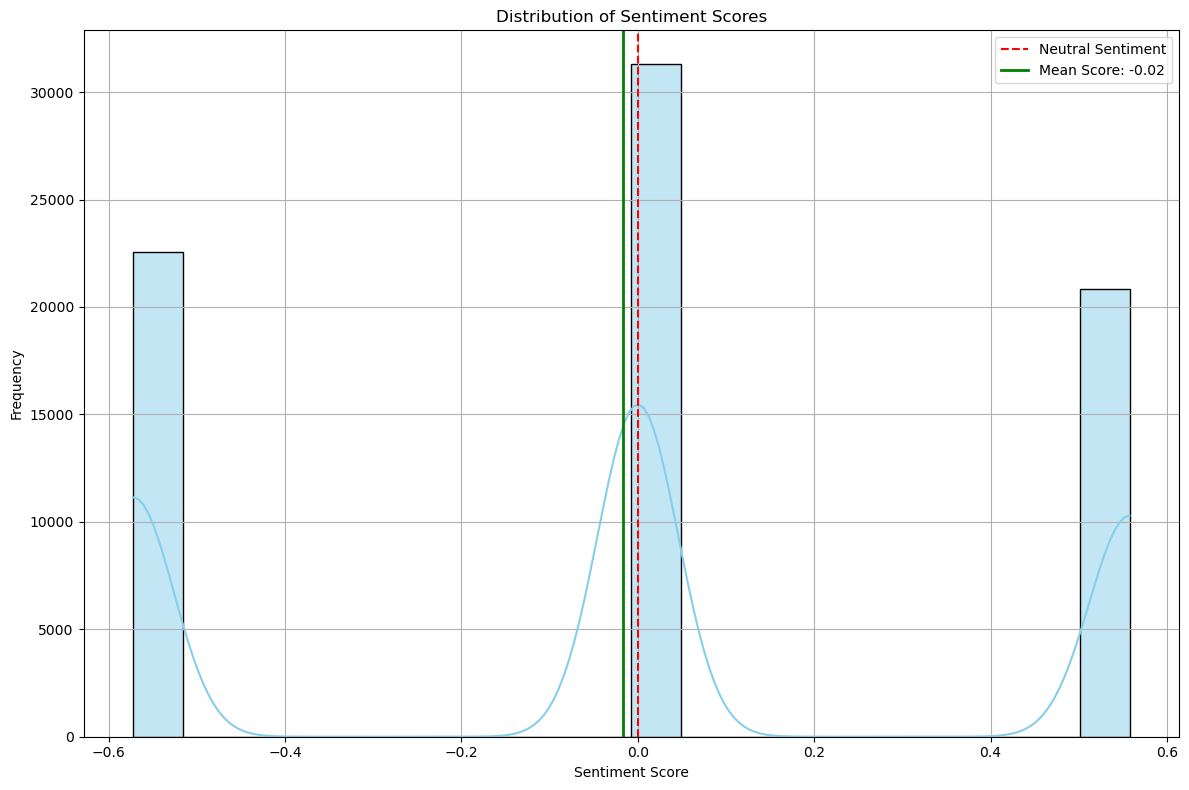

In [14]:
# Visualize sentiment distribution
plt.figure(figsize=(12, 8))
sns.histplot(data['sentiment_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral Sentiment')
plt.axvline(x=data['sentiment_score'].mean(), color='green', linestyle='-', linewidth=2, label=f'Mean Score: {data["sentiment_score"].mean():.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

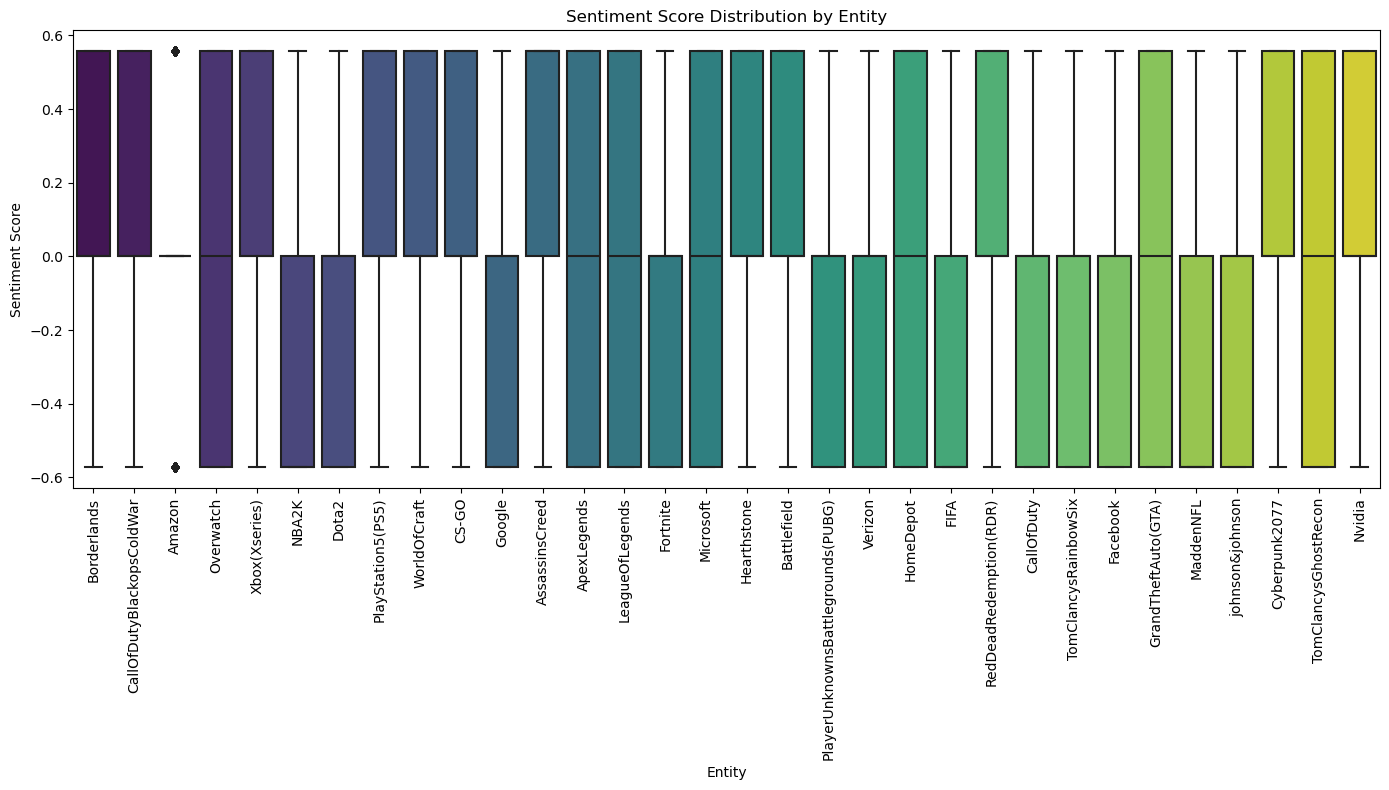

In [15]:
# Sentiment score distribution by entity (box plot)
plt.figure(figsize=(14, 8))
sns.boxplot(x='entity', y='sentiment_score', data=data, palette='viridis')
plt.title('Sentiment Score Distribution by Entity')
plt.xlabel('Entity')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top 5 Positive Tweets:
        entity      text  sentiment_score
0  Borderlands  Positive           0.5574
1  Borderlands  Positive           0.5574
2  Borderlands  Positive           0.5574
3  Borderlands  Positive           0.5574
4  Borderlands  Positive           0.5574
Top 5 Negative Tweets:
         entity      text  sentiment_score
24  Borderlands  Negative          -0.5719
25  Borderlands  Negative          -0.5719
26  Borderlands  Negative          -0.5719
27  Borderlands  Negative          -0.5719
28  Borderlands  Negative          -0.5719


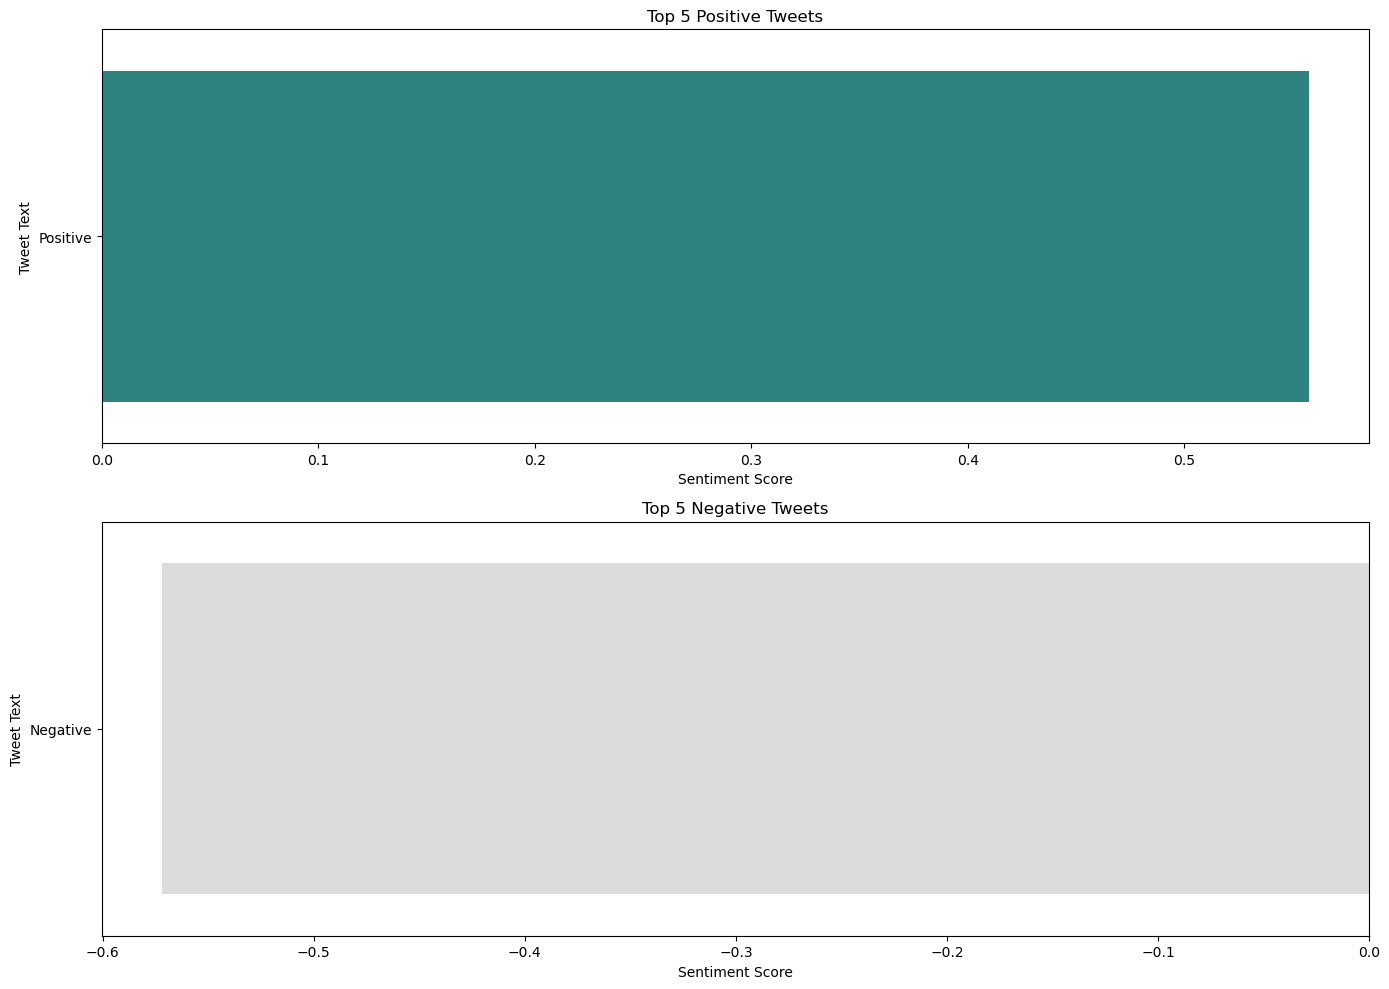

In [20]:
# Top 5 positive and negative tweets
top_positive_tweets = data.nlargest(5, 'sentiment_score')[['entity', 'text', 'sentiment_score']]
top_negative_tweets = data.nsmallest(5, 'sentiment_score')[['entity', 'text', 'sentiment_score']]

print("Top 5 Positive Tweets:")
print(top_positive_tweets)
print("Top 5 Negative Tweets:")
print(top_negative_tweets)

# Plotting
plt.figure(figsize=(14, 10))

# Top 5 Positive Tweets
plt.subplot(2, 1, 1)
sns.barplot(x='sentiment_score', y='text', data=top_positive_tweets, palette='viridis')
plt.title('Top 5 Positive Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Tweet Text')

# Top 5 Negative Tweets
plt.subplot(2, 1, 2)
sns.barplot(x='sentiment_score', y='text', data=top_negative_tweets, palette='coolwarm')
plt.title('Top 5 Negative Tweets')
plt.xlabel('Sentiment Score')
plt.ylabel('Tweet Text')

plt.tight_layout()
plt.show()

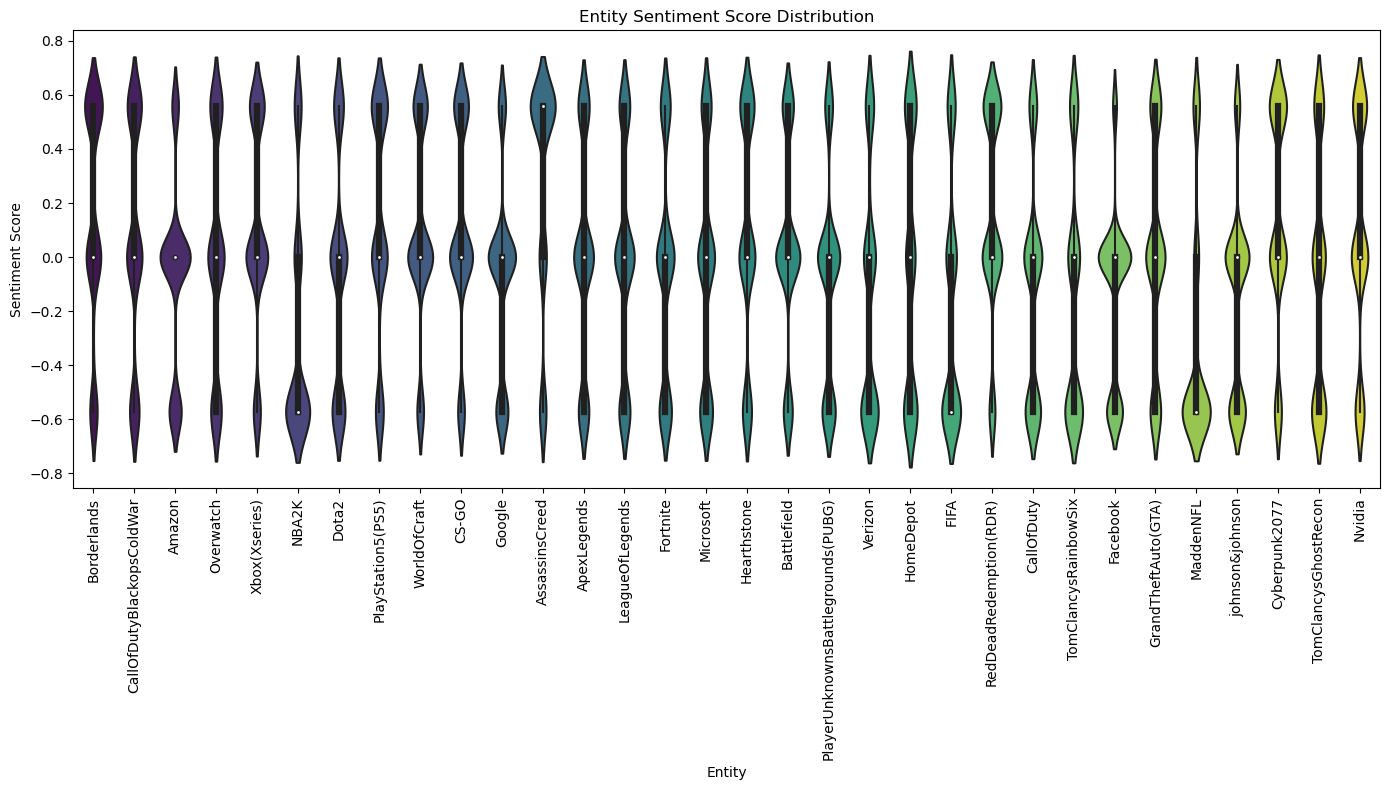

In [17]:
# Violin plot of sentiment score by entity
plt.figure(figsize=(14, 8))
sns.violinplot(x='entity', y='sentiment_score', data=data, palette='viridis')
plt.title('Entity Sentiment Score Distribution')
plt.xlabel('Entity')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ziadk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Column names in the DataFrame: Index(['id', 'entity', 'text', 'label'], dtype='object')
First few rows of the DataFrame:
     id       entity      text  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               label  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
DataFrame with Sentiment Scores:
     id       entity      text  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               label  sentiment_score  
0  im getting on borderlands and i

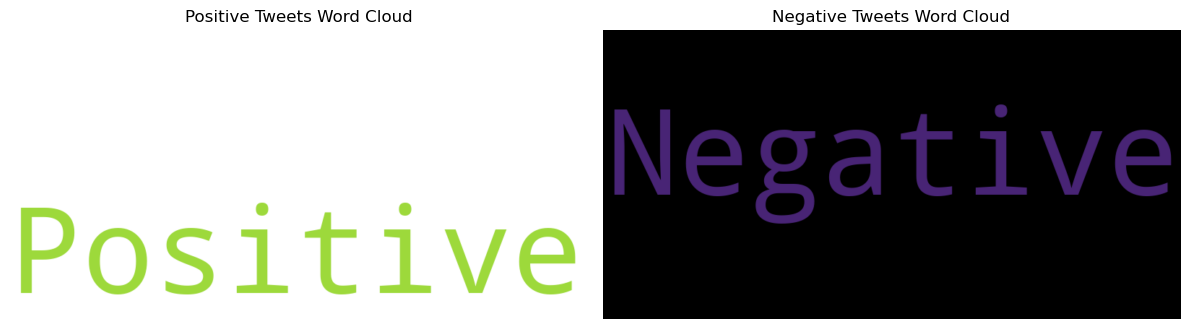

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure you have downloaded the necessary NLTK data
nltk.download('vader_lexicon')

# Load the dataset without headers
data = pd.read_csv('twitter_training.csv', header=None)

# Manually assign column names based on inspection
data.columns = ['id', 'entity', 'text', 'label']

# Display the column names and the first few rows to confirm
print("Column names in the DataFrame:", data.columns)
print("First few rows of the DataFrame:")
print(data.head())

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis
data['sentiment_score'] = data['text'].apply(get_sentiment_score)

# Display the DataFrame with sentiment scores to confirm column creation
print("DataFrame with Sentiment Scores:")
print(data.head())

# Word clouds for positive and negative tweets
positive_tweets = " ".join(tweet for tweet in data[data['sentiment_score'] > 0.5]['text'])
negative_tweets = " ".join(tweet for tweet in data[data['sentiment_score'] < -0.5]['text'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()
